In [17]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# Zad 1 - Proste przeszukiwanie grafu

In [3]:
def calculate_dominant_vectors(matrix: np.ndarray, epsilon, max_iter):
    n = matrix.shape[0]
    prev = np.zeros(n)
    curr = np.random.rand(n)
    curr = curr/np.linalg.norm(curr)
    i = 0
    while np.linalg.norm(prev - curr) > epsilon and i < max_iter:
        i+=1
        prev = curr.copy()
        curr = np.dot(matrix, curr)
        curr = curr/np.linalg.norm(curr)
    return curr

def rank_basic(graph: nx.DiGraph):
    array = nx.to_numpy_array(graph)
    degrees = np.sum(array, axis=1)
    array = array/degrees[:, None]
    dominant = calculate_dominant_vectors(array, 0.0000001, 1000000)
    return dominant

def random_dense_graph(n):
    return nx.gnm_random_graph(n, random.uniform(0.6, 1)*(n**2 - n), directed=True)

In [4]:
one = random_dense_graph(11)
two = random_dense_graph(13)
tree = random_dense_graph(15)

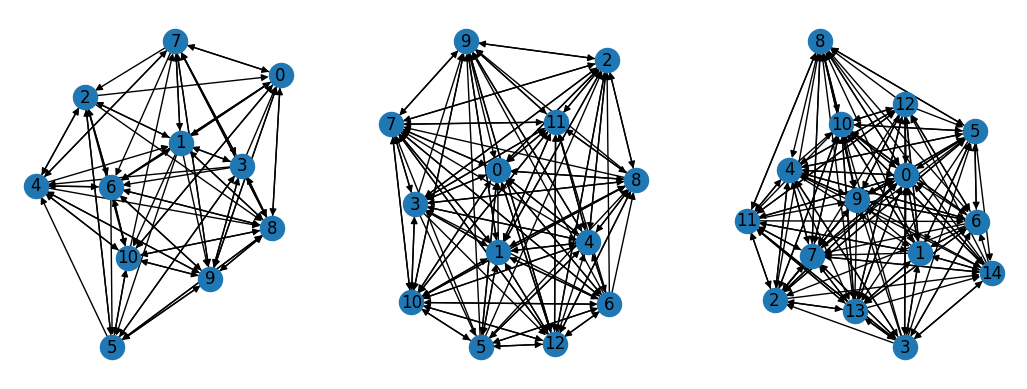

In [5]:
fig, axis = plt.subplots(ncols=3)
fig.set_figwidth(13)
nx.draw(one, ax=axis[0], with_labels=True)
nx.draw(two, ax=axis[1], with_labels=True)
nx.draw(tree, ax=axis[2], with_labels=True)

In [6]:
l = [one, two, tree]
i=1
for g in l:
    print(i)
    i+=1
    print(g.in_degree)
    print(g.out_degree)


1
[(0, 8), (1, 7), (2, 5), (3, 5), (4, 7), (5, 7), (6, 9), (7, 7), (8, 10), (9, 9), (10, 8)]
[(0, 6), (1, 9), (2, 7), (3, 8), (4, 7), (5, 6), (6, 8), (7, 8), (8, 8), (9, 8), (10, 7)]
2
[(0, 12), (1, 11), (2, 11), (3, 9), (4, 11), (5, 7), (6, 7), (7, 12), (8, 10), (9, 11), (10, 11), (11, 11), (12, 11)]
[(0, 10), (1, 12), (2, 9), (3, 11), (4, 11), (5, 10), (6, 12), (7, 9), (8, 10), (9, 8), (10, 11), (11, 10), (12, 11)]
3
[(0, 14), (1, 10), (2, 10), (3, 8), (4, 11), (5, 11), (6, 11), (7, 13), (8, 11), (9, 12), (10, 12), (11, 10), (12, 9), (13, 12), (14, 9)]
[(0, 12), (1, 12), (2, 10), (3, 12), (4, 12), (5, 10), (6, 11), (7, 11), (8, 8), (9, 10), (10, 12), (11, 11), (12, 12), (13, 11), (14, 9)]


In [7]:
i=1
for g in l:
    print(f"Graf {i}")
    i+=1
    r = rank_basic(g)
    print(r)
    print(np.argmax(r))

Graf 1
[0.30151135 0.30151135 0.30151134 0.30151134 0.30151135 0.30151135
 0.30151134 0.30151135 0.30151135 0.30151134 0.30151134]
5
Graf 2
[0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501
 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501]
0
Graf 3
[0.25819889 0.25819889 0.25819889 0.25819889 0.25819889 0.25819889
 0.25819889 0.25819889 0.25819889 0.25819889 0.25819889 0.25819889
 0.25819889 0.25819889 0.25819889]
9


# Zad 2 - PageRank

In [22]:
def page_rank(graph: nx.DiGraph, d, e:np.ndarray, eps, max_iter):
    array = nx.to_numpy_array(graph)
    degrees = np.sum(array, axis=1)
    degrees[degrees == 0] = degrees.size
    A = array/degrees[:, None]
    B = d*A + np.dot((1-d)*e, np.identity(e.shape[0]))
    del A
    r = np.random.random(B.shape[1])

    for i in tqdm(range(max_iter)):
        i+=1
        r_1 = np.dot(B, r)
        d = np.linalg.norm(r) - np.linalg.norm(r_1)
        r_1 = r_1 + d*e

        if np.linalg.norm(r_1 - r) < eps:
            r = r_1
            break
        r = r_1


    return r

In [9]:
d_vals = [0.9, 0.85, 0.75, 0.6, 0.5]
counts = {one:[], two:[], tree:[]}
for d in d_vals:
    for g in l:
        e = np.ones(g.number_of_nodes())*1/g.number_of_nodes()
        r = page_rank(g, d, e, 0.00001, 1000000)
        counts[g].append(int(np.argmax(r)))
print(counts[one])
print(counts[two])
print(counts[tree])

[5, 3, 5, 3, 10]
[0, 7, 2, 4, 2]
[0, 6, 9, 5, 6]


In [10]:
big_graph = nx.read_edgelist("Wiki-Vote.txt", comments="#", create_using=nx.DiGraph)

In [11]:
print(big_graph.number_of_nodes())

7115


  1%|          | 122/10000 [00:02<03:51, 42.71it/s]


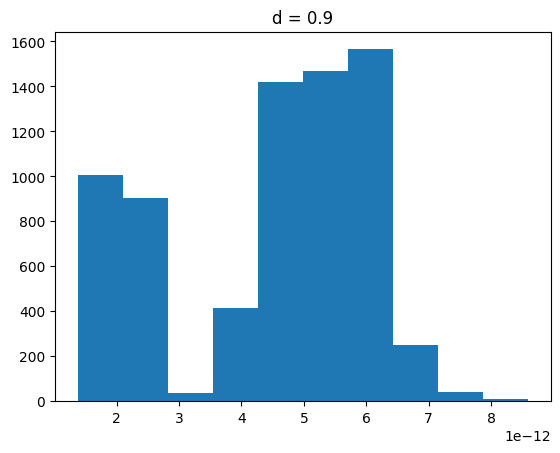

  1%|          | 122/10000 [00:03<04:26, 37.06it/s]


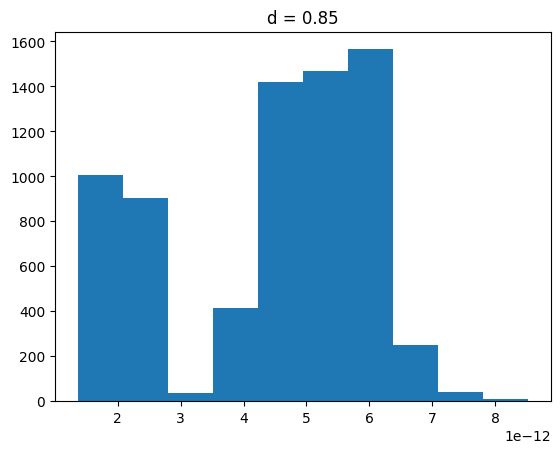

  1%|          | 122/10000 [00:02<03:37, 45.38it/s]


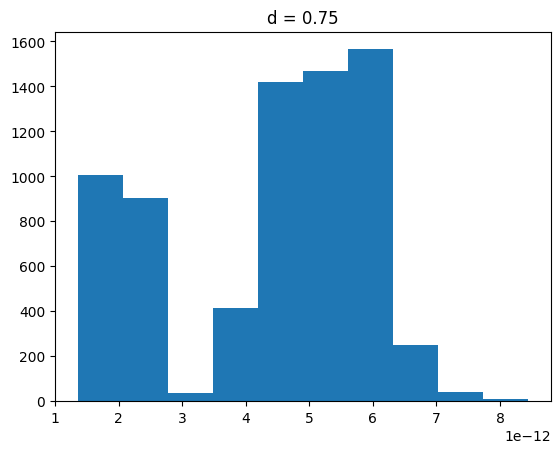

  1%|          | 122/10000 [00:02<03:30, 46.86it/s]


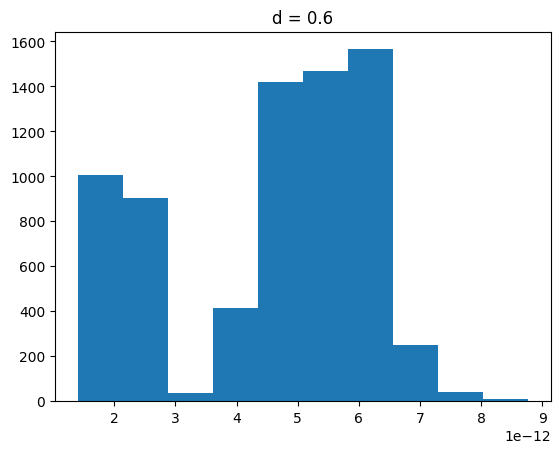

  1%|          | 122/10000 [00:02<03:29, 47.05it/s]


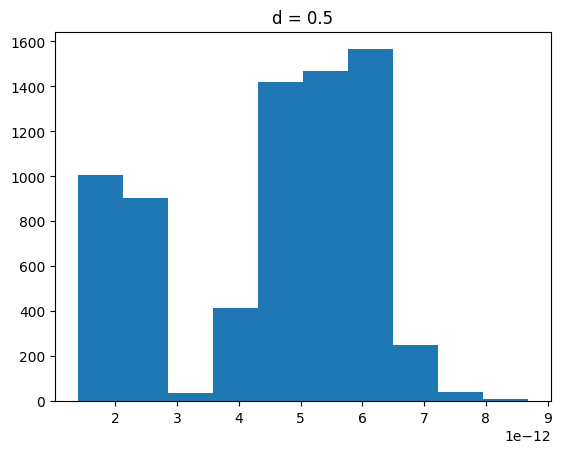

In [25]:
e = np.ones(big_graph.number_of_nodes())*1/big_graph.number_of_nodes()
r_vals = [None for d in d_vals]
i = 0
for d in d_vals:
    r = page_rank(big_graph, 0.75, e, 10**-10, 10000)
    plt.title(f"d = {d}")
    plt.hist(r)
    plt.show()